In [94]:
import pandas as pd
import re
import seaborn as sns

In [95]:
df=pd.read_csv("dataframe")

In [96]:
column_regex = re.compile(r'^.*min.*$')

In [97]:
# droping rows with all Nans 
df_filtered = df.filter(regex=column_regex)
df_filtered.dropna(inplace=True)
df_kept = df.loc[:, ['Name', 'best_known_sol']]
df_merged = df_kept.join(df_filtered)
df_merged.dropna(inplace=True)

c:\Users\karim\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [98]:
df = df.drop(columns=df_filtered.columns)

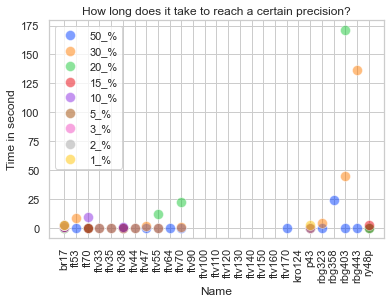

In [99]:
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set_context("notebook")

# create a bubble chart for each column
for i, col in enumerate(df.columns[3:]):
    sns.scatterplot(data=df, x='Name', y=col, s=100, alpha=0.5, label=col)

# set axis labels and legend
plt.xlabel('Name')
plt.ylabel('Time in second')
plt.title("How long does it take to reach a certain precision?")
plt.legend()
# rotate the x labels
plt.xticks(rotation=90)

# show the plot
plt.show()

In [100]:
# full dataframe with no NaNs
# df = pd.merge(df_merged, df, on=['Name', 'best_known_sol'], how='inner')

In [101]:
# calculating percent above best known solution
for col in df_merged.columns[2:]:
    df_merged[col] = 100 * (df_merged[col] - df_merged['best_known_sol']) / df_merged['best_known_sol']

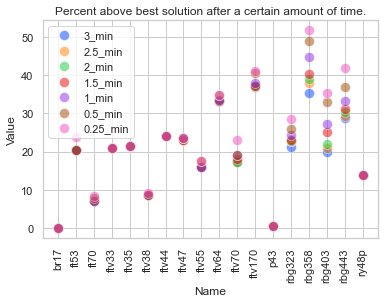

In [102]:
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set_context("notebook")

# create a bubble chart for each column
for i, col in enumerate(df_merged.columns[2:]):
    sns.scatterplot(data=df_merged, x='Name', y=col, s=100, alpha=0.5, label=col)

# set axis labels and legend
plt.xlabel('Name')
plt.ylabel('Value')
plt.legend()
plt.title("Percent above best solution after a certain amount of time.")
# rotate the x labels
plt.xticks(rotation=90)

# show the plot
plt.show()

